In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [2]:
# Load the dataset
df = pd.read_csv("/content/heart.csv")

# Separate features and target variable
X = df.drop(columns='target')
y = df['target']


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [4]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Build the ANN model
model_nn = Sequential()
model_nn.add(Dense(units=13, activation='relu', input_dim=X_train.shape[1]))
model_nn.add(Dense(units=7, activation='relu'))
model_nn.add(Dense(units=3, activation='relu'))
model_nn.add(Dense(units=1, activation='sigmoid'))
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train_scaled, y_train, validation_split=0.33, batch_size=10, epochs=1000,
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.0001, patience=20)])

Epoch 1/1000
46/46 [==============================] - 1s 5ms/step - loss: 0.6628 - accuracy: 0.6144 - val_loss: 0.6615 - val_accuracy: 0.6211
Epoch 2/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.7059 - val_loss: 0.6230 - val_accuracy: 0.6916
Epoch 3/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7800 - val_loss: 0.5964 - val_accuracy: 0.7357
Epoch 4/1000
46/46 [==============================] - 0s 3ms/step - loss: 0.5328 - accuracy: 0.8148 - val_loss: 0.5758 - val_accuracy: 0.7533
Epoch 5/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.8257 - val_loss: 0.5572 - val_accuracy: 0.7797
Epoch 6/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.8431 - val_loss: 0.5440 - val_accuracy: 0.7930
Epoch 7/1000
46/46 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.8475 - val_loss: 0.5330 - val_accuracy: 0.8194
Epoch 

In [6]:
# Train the Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Train the Decision Tree model with hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2', None]
}
tree_model = DecisionTreeClassifier(random_state=2)
grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_tree_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(

In [7]:
# Train the Naive Bayes model
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_scaled, y_train)


GaussianNB()

In [8]:
# Evaluate models on the testing dataset
models = [model_nn, model_lr, best_tree_model, naive_bayes_classifier]
model_names = ['Neural Network', 'Logistic Regression', 'Decision Tree', 'Naive Bayes']

# Lists to store evaluation metrics for each model
accuracies_train = []
accuracies_test = []
classification_reports_train = []
classification_reports_test = []
confusion_matrices_train = []
confusion_matrices_test = []

In [9]:
for model, name in zip(models, model_names):
    # Accuracy
    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)

    # Thresholding for binary classification
    train_predictions_binary = (train_predictions > 0.5).astype(int)
    test_predictions_binary = (test_predictions > 0.5).astype(int)

    train_accuracy = accuracy_score(y_train, train_predictions_binary)
    test_accuracy = accuracy_score(y_test, test_predictions_binary)

    # Classification Report
    train_classification_report = classification_report(y_train, train_predictions_binary, output_dict=True)
    test_classification_report = classification_report(y_test, test_predictions_binary, output_dict=True)

    # Confusion Matrix
    train_conf_matrix = confusion_matrix(y_train, train_predictions_binary)
    test_conf_matrix = confusion_matrix(y_test, test_predictions_binary)

    # Store metrics in lists
    accuracies_train.append(train_accuracy)
    accuracies_test.append(test_accuracy)
    classification_reports_train.append(train_classification_report)
    classification_reports_test.append(test_classification_report)
    confusion_matrices_train.append(train_conf_matrix)
    confusion_matrices_test.append(test_conf_matrix)


11/11 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


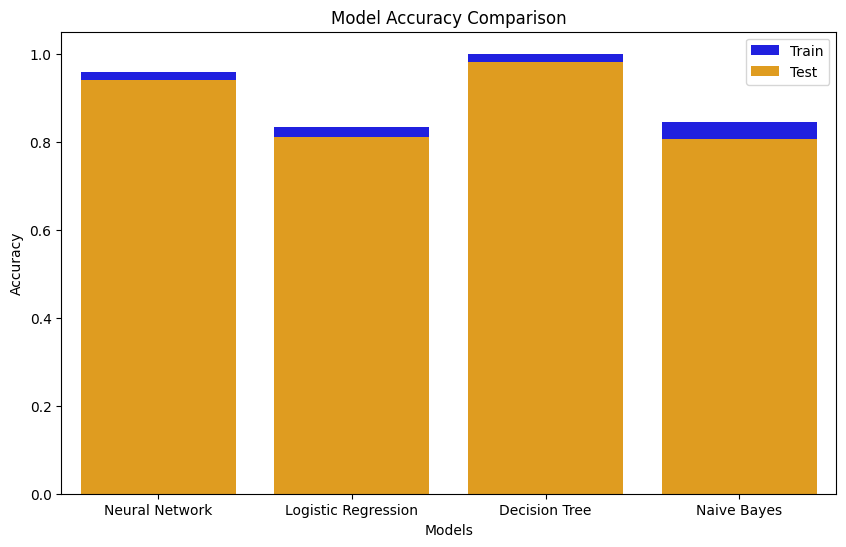

In [10]:
# Comparison Graphs
# Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies_train, color='blue', label='Train')
sns.barplot(x=model_names, y=accuracies_test, color='orange', label='Test')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

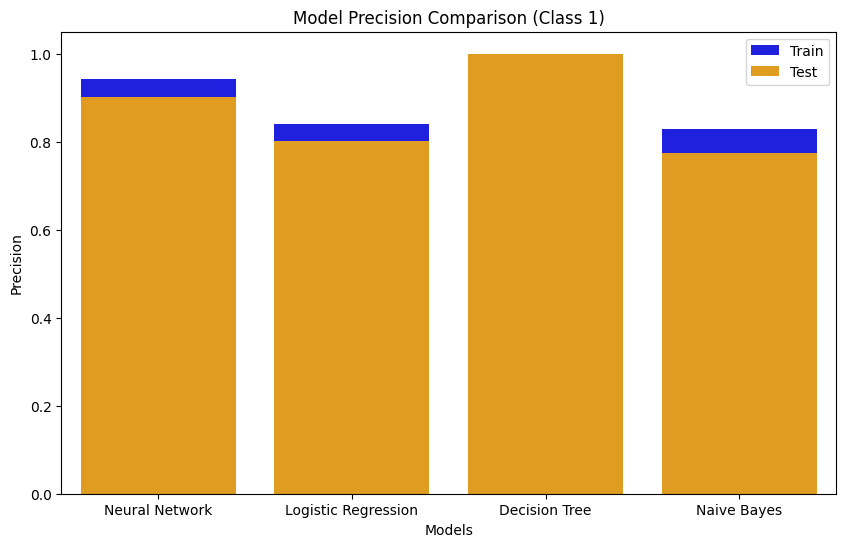

In [11]:
# Precision Comparison
precisions_train = [report['1']['precision'] for report in classification_reports_train]
precisions_test = [report['1']['precision'] for report in classification_reports_test]
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=precisions_train, color='blue', label='Train')
sns.barplot(x=model_names, y=precisions_test, color='orange', label='Test')
plt.title('Model Precision Comparison (Class 1)')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.legend()
plt.show()


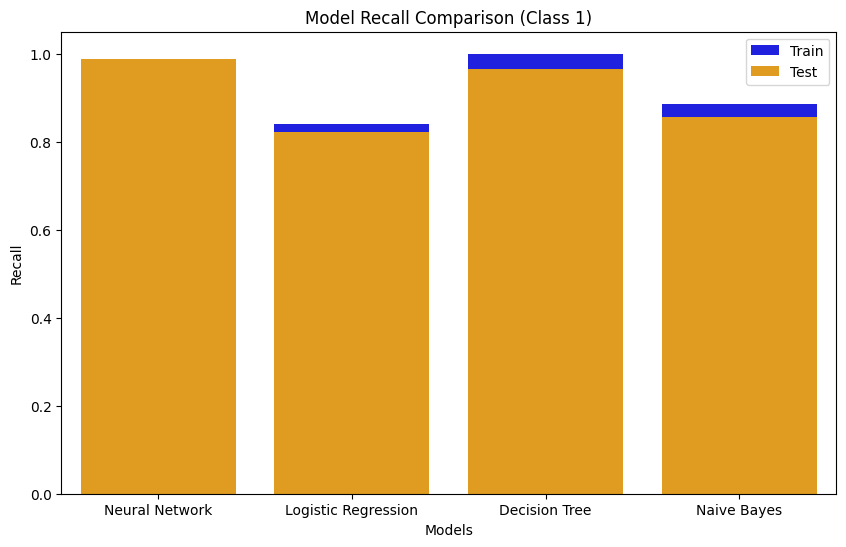

In [12]:
# Recall Comparison
recalls_train = [report['1']['recall'] for report in classification_reports_train]
recalls_test = [report['1']['recall'] for report in classification_reports_test]
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=recalls_train, color='blue', label='Train')
sns.barplot(x=model_names, y=recalls_test, color='orange', label='Test')
plt.title('Model Recall Comparison (Class 1)')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.legend()
plt.show()


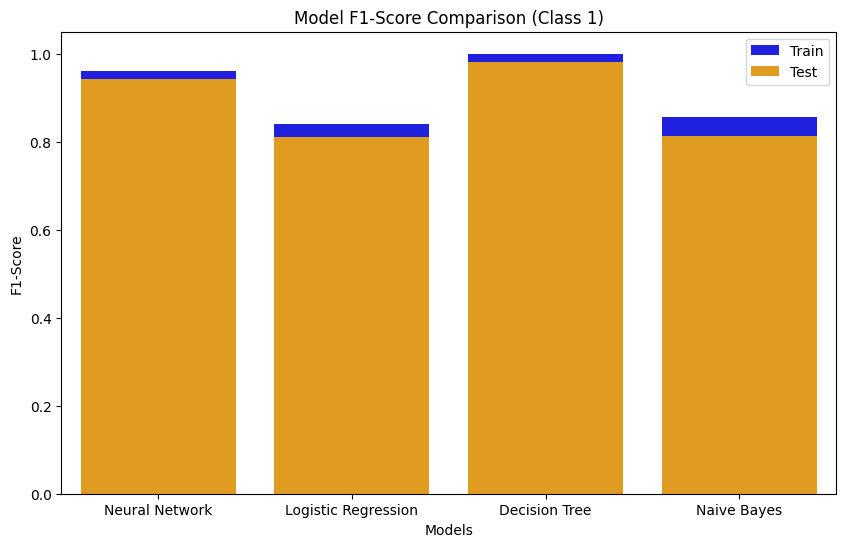

In [13]:
# F1-Score Comparison
f1_scores_train = [report['1']['f1-score'] for report in classification_reports_train]
f1_scores_test = [report['1']['f1-score'] for report in classification_reports_test]
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=f1_scores_train, color='blue', label='Train')
sns.barplot(x=model_names, y=f1_scores_test, color='orange', label='Test')
plt.title('Model F1-Score Comparison (Class 1)')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.legend()
plt.show()

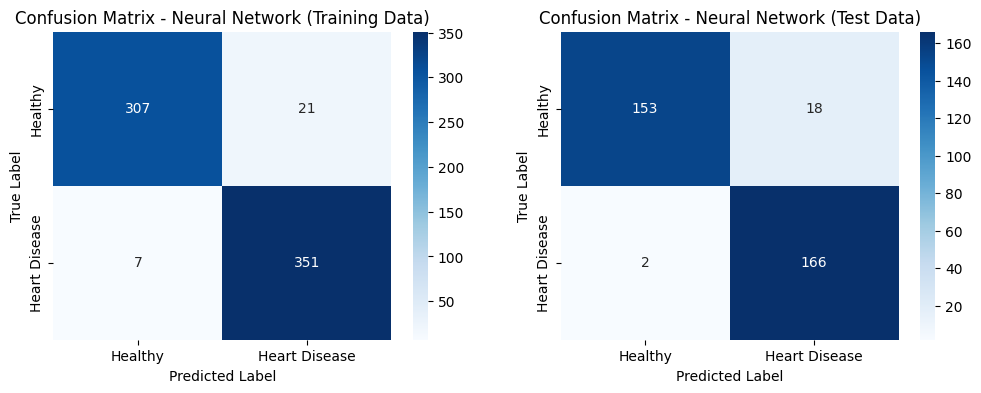

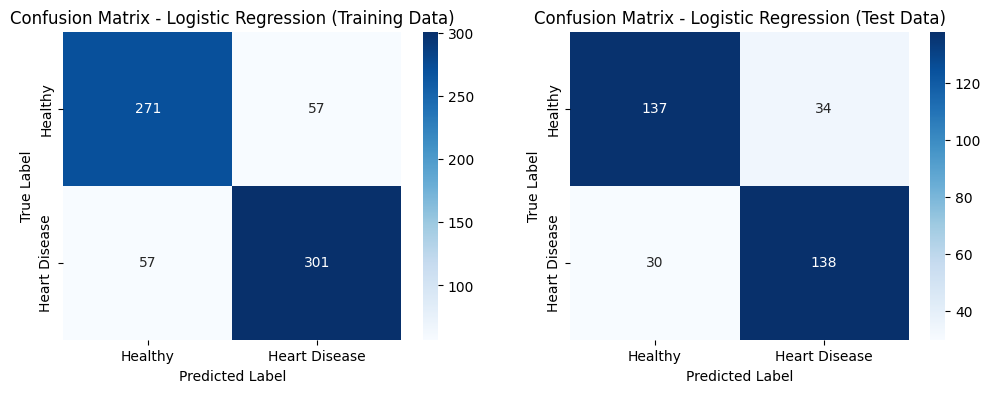

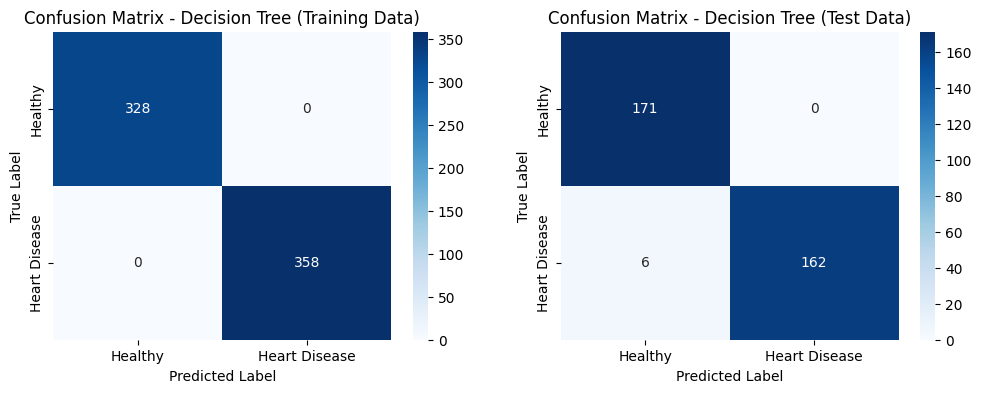

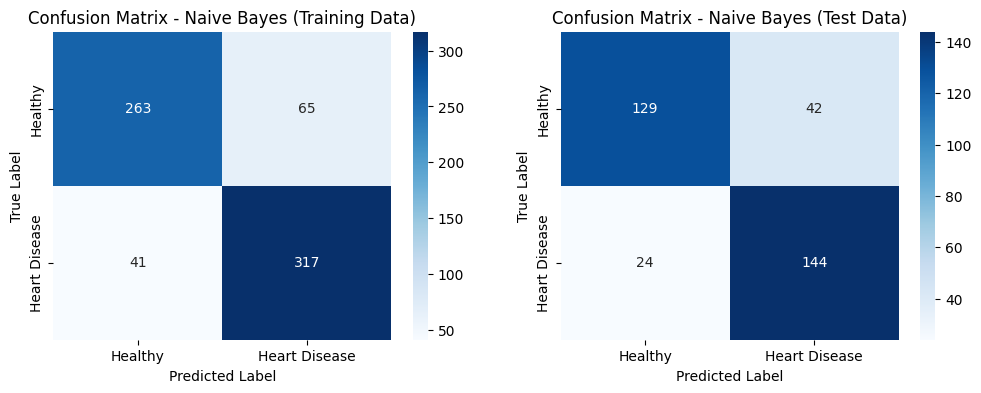

In [15]:
# Confusion Matrix Comparison (Train and Test Side by Side)
for model, name, conf_matrix_train, conf_matrix_test in zip(models, model_names, confusion_matrices_train, confusion_matrices_test):
    # Plot confusion matrices side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Training data
    sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Heart Disease"],
                yticklabels=["Healthy", "Heart Disease"], ax=axes[0])
    axes[0].set_title(f"Confusion Matrix - {name} (Training Data)")
    axes[0].set_xlabel("Predicted Label")
    axes[0].set_ylabel("True Label")

    # Test data
    sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Heart Disease"],
                yticklabels=["Healthy", "Heart Disease"], ax=axes[1])
    axes[1].set_title(f"Confusion Matrix - {name} (Test Data)")
    axes[1].set_xlabel("Predicted Label")
    axes[1].set_ylabel("True Label")

    plt.show()
